In [3]:
from   config            import plotly_id, plotly_key
import plotly
import plotly.plotly     as py
import plotly.graph_objs as go
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

plotly.tools.set_credentials_file(username=plotly_id, api_key=plotly_key)
sns.set(color_codes=True)

# Athletes

In [4]:
games = pd.read_pickle('../dat/games.pkl')
games.head()

,Name,Sex,NOC,Games,Year,Season,Sport,Event,Medal,Host Country,region
0,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Tennis,Tennis Men's Singles,NaN,GRE,Australia
1,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Tennis,Tennis Men's Doubles,Bronze,GRE,Australia
2,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Athletics,Athletics Men's 800 metres,Gold,GRE,Australia
3,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Athletics,"Athletics Men's 1,500 metres",Gold,GRE,Australia
4,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Athletics,Athletics Men's Marathon,NaN,GRE,Australia


In [5]:
games['Summer']     = games['Season'] == 'Summer'
games['Female']     = games['Sex']    == 'F'
games['Gold']       = games['Medal']  == 'Gold'
games['Silver']     = games['Medal']  == 'Silver'
games['Bronze']     = games['Medal']  == 'Bronze'
games['Home Field'] = games['NOC']    == games['Host Country']
games.head()

,Name,Sex,NOC,Games,Year,Season,Sport,Event,Medal,Host Country,region,Summer,Female,Gold,Silver,Bronze,Home Field
0,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Tennis,Tennis Men's Singles,NaN,GRE,Australia,True,False,False,False,False,False
1,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Tennis,Tennis Men's Doubles,Bronze,GRE,Australia,True,False,False,False,True,False
2,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Athletics,Athletics Men's 800 metres,Gold,GRE,Australia,True,False,True,False,False,False
3,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Athletics,"Athletics Men's 1,500 metres",Gold,GRE,Australia,True,False,True,False,False,False
4,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Athletics,Athletics Men's Marathon,NaN,GRE,Australia,True,False,False,False,False,False


In [6]:
# Total number of event contestants
games.shape

(270767, 17)

In [7]:
# Total number of unique athletes
pd.DataFrame(games.groupby(['Name','Games','region'])['Medal'].count())['Medal'].value_counts().sum()

187099

In [8]:
# Distribution of number of medals won by an individual athlete
pd.DataFrame(games.groupby(['Name','Games','region'])['Medal'].count())['Medal'].value_counts()

0    151949
1     31703
2      2659
3       545
4       148
5        58
6        26
7         8
8         3
Name: Medal, dtype: int64

In [33]:
# Percent distribution of number of medals won by an individual athlete
distribution = pd.DataFrame(games.groupby(['Name','Games','region'])['Medal'].count())['Medal'].value_counts()/187099
distribution

0    0.812132
1    0.169445
2    0.014212
3    0.002913
4    0.000791
5    0.000310
6    0.000139
7    0.000043
8    0.000016
Name: Medal, dtype: float64

In [36]:
0.812132 + 0.169445

0.9815769999999999

In [45]:
# Top athletes by number of medals won
athletes           = pd.DataFrame(games.groupby(['Name','Games','NOC','region'])['Gold','Silver','Bronze'].sum())
athletes['Gold']   = athletes['Gold'].astype('int64')
athletes['Silver'] = athletes['Silver'].astype('int64')
athletes['Bronze'] = athletes['Bronze'].astype('int64')
athletes['Medals'] = athletes['Gold'] + athletes['Silver'] + athletes['Bronze']
athletes           = athletes.sort_values(by='Medals', ascending=False)
athletes           = athletes.reset_index()
athletes           = athletes.rename(columns={'Name':       'Athletes',
                                              'region':     'Region',
                                              'Gold':       'Golds',
                                              'Silver':     'Silvers',
                                              'Bronze':     'Bronzes'})
athletes.head(20)

,Athletes,Games,NOC,Region,Golds,Silvers,Bronzes,Medals
0,"Michael Fred Phelps, II",2008 Summer,USA,USA,8,0,0,8
1,"Michael Fred Phelps, II",2004 Summer,USA,USA,6,0,2,8
2,Aleksandr Nikolayevich Dityatin,1980 Summer,URS,Russia,3,4,1,8
3,"Willis Augustus Lee, Jr.",1920 Summer,USA,USA,5,1,1,7
4,Nikolay Yefimovich Andrianov,1976 Summer,URS,Russia,4,2,1,7
5,Mariya Kindrativna Horokhovska,1952 Summer,URS,Russia,2,5,0,7
6,Mark Andrew Spitz,1972 Summer,USA,USA,7,0,0,7
7,Mikhail Yakovlevich Voronin,1968 Summer,URS,Russia,2,4,1,7
8,Borys Anfiyanovych Shakhlin,1960 Summer,URS,Russia,4,2,1,7
9,Lloyd Spencer Spooner,1920 Summer,USA,USA,4,1,2,7


# Teams

In [38]:
# Total number of unique teams
pd.DataFrame(games.groupby(['Games','region'])['Medal'].count())['Medal'].value_counts().sum()

3791

In [39]:
# Distribution of number of medals won by an individual team
pd.DataFrame(games.groupby(['Games','region'])['Medal'].count())['Medal'].value_counts()

0      2151
1       264
2       154
3       115
5        66
4        65
6        57
7        52
8        40
9        39
12       34
10       32
15       32
14       31
13       31
16       30
11       25
20       24
17       22
23       22
19       18
22       17
30       16
21       15
24       14
18       14
29       13
26       13
25       11
31       11
       ... 
263       1
442       1
368       1
132       1
184       1
134       1
140       1
142       1
152       1
154       1
158       1
164       1
166       1
170       1
174       1
182       1
188       1
352       1
190       1
192       1
194       1
198       1
214       1
220       1
242       1
273       1
286       1
296       1
300       1
248       1
Name: Medal, Length: 161, dtype: int64

In [40]:
# Percent distribution of number of medals won by an individual team
distribution = pd.DataFrame(games.groupby(['Games','region'])['Medal'].count())['Medal'].value_counts()/3791
distribution

0      0.567396
1      0.069639
2      0.040623
3      0.030335
5      0.017410
4      0.017146
6      0.015036
7      0.013717
8      0.010551
9      0.010288
12     0.008969
10     0.008441
15     0.008441
14     0.008177
13     0.008177
16     0.007913
11     0.006595
20     0.006331
17     0.005803
23     0.005803
19     0.004748
22     0.004484
30     0.004221
21     0.003957
24     0.003693
18     0.003693
29     0.003429
26     0.003429
25     0.002902
31     0.002902
         ...   
263    0.000264
442    0.000264
368    0.000264
132    0.000264
184    0.000264
134    0.000264
140    0.000264
142    0.000264
152    0.000264
154    0.000264
158    0.000264
164    0.000264
166    0.000264
170    0.000264
174    0.000264
182    0.000264
188    0.000264
352    0.000264
190    0.000264
192    0.000264
194    0.000264
198    0.000264
214    0.000264
220    0.000264
242    0.000264
273    0.000264
286    0.000264
296    0.000264
300    0.000264
248    0.000264
Name: Medal, Length: 161

In [50]:
# Top teams by number of medals won
athletes           = pd.DataFrame(games.groupby(['Games','Host Country','NOC','region'])['Gold','Silver','Bronze'].sum())
athletes['Gold']   = athletes['Gold'].astype('int64')
athletes['Silver'] = athletes['Silver'].astype('int64')
athletes['Bronze'] = athletes['Bronze'].astype('int64')
athletes['Medals'] = athletes['Gold'] + athletes['Silver'] + athletes['Bronze']
athletes           = athletes.sort_values(by='Medals', ascending=False)
athletes           = athletes.reset_index()
athletes           = athletes.rename(columns={'Name':       'Athletes',
                                              'region':     'Region',
                                              'Gold':       'Golds',
                                              'Silver':     'Silvers',
                                              'Bronze':     'Bronzes'})
athletes.head(20)

,Games,Host Country,NOC,Region,Golds,Silvers,Bronzes,Medals
0,1980 Summer,URS,URS,Russia,187,129,126,442
1,1904 Summer,USA,USA,USA,128,141,125,394
2,1908 Summer,GBR,GBR,UK,147,131,90,368
3,1984 Summer,USA,USA,USA,186,116,50,352
4,2008 Summer,CHN,USA,USA,127,110,80,317
5,1988 Summer,KOR,URS,Russia,134,67,99,300
6,1976 Summer,CAN,URS,Russia,114,95,77,286
7,2016 Summer,BRA,USA,USA,139,54,71,264
8,1980 Summer,URS,GDR,Germany,115,88,61,264
9,2004 Summer,GRE,USA,USA,117,75,71,263


# Exploratory Data Analysis

In [2]:
medals = pd.read_pickle('../dat/medals.pkl')
medals.head()

,Year,Summer,Games,Host,NOC,Region,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes
0,1896,1,1896 Summer,0,AUS,Australia,5,0,2,5,3,2,0,1
1,1896,1,1896 Summer,0,AUT,Austria,8,0,3,8,5,2,1,2
2,1896,1,1896 Summer,0,DEN,Denmark,15,0,5,12,6,1,2,3
3,1896,1,1896 Summer,0,FRA,France,26,0,6,18,11,5,4,2
4,1896,1,1896 Summer,0,GBR,UK,25,0,7,19,9,3,3,3


In [3]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3821 entries, 0 to 3820
Data columns (total 14 columns):
Year        3821 non-null int64
Summer      3821 non-null int64
Games       3821 non-null object
Host        3821 non-null int64
NOC         3821 non-null object
Region      3821 non-null object
Athletes    3821 non-null int64
Females     3821 non-null int64
Sports      3821 non-null int64
Events      3821 non-null int64
Medals      3821 non-null int64
Golds       3821 non-null int64
Silvers     3821 non-null int64
Bronzes     3821 non-null int64
dtypes: int64(11), object(3)
memory usage: 418.0+ KB


In [4]:
medals.describe()

,Year,Summer,Host,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes
count,3821.000000,3821.000000,3821.000000,3821.000000,3821.000000,3821.000000,3821.000000,3821.000000,3821.000000,3821.000000,3821.000000
mean,1981.893222,0.731222,0.013086,70.862863,19.469511,6.991364,29.879613,10.409317,3.499346,3.431562,3.478409
std,28.406605,0.443382,0.113656,117.274136,42.615103,6.390493,41.637229,30.405961,12.806936,10.313126,9.783246
min,1896.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1964.000000,0.000000,0.000000,7.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1988.000000,1.000000,0.000000,22.000000,3.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000
75%,2004.000000,1.000000,0.000000,80.000000,17.000000,10.000000,36.000000,6.000000,1.000000,1.000000,2.000000
max,2016.000000,1.000000,1.000000,1109.000000,369.000000,34.000000,270.000000,442.000000,187.000000,141.000000,126.000000


In [5]:
medals.columns

Index(['Year', 'Summer', 'Games', 'Host', 'NOC', 'Region', 'Athletes',
       'Females', 'Sports', 'Events', 'Medals', 'Golds', 'Silvers', 'Bronzes'],
      dtype='object')

In [6]:
hover_text = []
color_range = []
for index, row in medals.iterrows():
    hover_text.append(('Games: {games}<br>'+
                       'Host: {host}<br>'+
                       'NOC: {noc}<br>'+
                       'Region: {region}<br>'+
                       'Athletes: {athletes}<br>'+
                       'Females: {females}<br>'+
                       'Sports: {sports}<br>'+
                       'Events: {events}<br>'+
                       'Medals: {medals}<br>'+
                       'Golds: {golds}<br>'+
                       'Silvers: {silvers}<br>'+
                       'Bronzes: {bronzes}').format(games    = row['Games'],
                                                    host     = row['Host'],
                                                    noc      = row['NOC'],
                                                    region   = row['Region'],
                                                    athletes = row['Athletes'],
                                                    females  = row['Females'],
                                                    sports   = row['Sports'],
                                                    events   = row['Events'],
                                                    medals   = row['Medals'],
                                                    golds    = row['Golds'],
                                                    silvers  = row['Silvers'],
                                                    bronzes  = row['Bronzes']))
    color_range.append(max(row['Athletes'],100))

trace0 = go.Scatter(
    x      = medals['Events'],
    y      = medals['Medals'],
    text   = hover_text,
    mode   = 'markers',
    marker = dict(
#        size          = medals['Athletes'],
        color         = color_range,
        showscale     = True,
        reversescale  = True,
        colorscale    = 'RdBu',
        colorbar      = dict(
                title = 'Total<br>Athletes'
            )
    )
)

data      = [trace0]
layout    = go.Layout(
    title = 'Historic Medal Table of the Olympic Games',
    xaxis = dict(
        title         = 'Total Number of Events Participated',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    yaxis = dict(
        title         = 'Total Number of Medals Won',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    paper_bgcolor = 'rgb(243, 243, 243)',
    plot_bgcolor  = 'rgb(243, 243, 243)',
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'historic-olympic-medals')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [7]:
medals['Games'].unique()

array(['1896 Summer', '1900 Summer', '1904 Summer', '1906 Summer',
       '1908 Summer', '1912 Summer', '1920 Summer', '1924 Summer',
       '1924 Winter', '1928 Summer', '1928 Winter', '1932 Summer',
       '1932 Winter', '1936 Summer', '1936 Winter', '1948 Summer',
       '1948 Winter', '1952 Summer', '1952 Winter', '1956 Summer',
       '1956 Winter', '1960 Summer', '1960 Winter', '1964 Summer',
       '1964 Winter', '1968 Summer', '1968 Winter', '1972 Summer',
       '1972 Winter', '1976 Summer', '1976 Winter', '1980 Summer',
       '1980 Winter', '1984 Summer', '1984 Winter', '1988 Summer',
       '1988 Winter', '1992 Summer', '1992 Winter', '1994 Winter',
       '1996 Summer', '1998 Winter', '2000 Summer', '2002 Winter',
       '2004 Summer', '2006 Winter', '2008 Summer', '2010 Winter',
       '2012 Summer', '2014 Winter', '2016 Summer'], dtype=object)

In [8]:
rio_2016_medals = medals[medals['Games'] == '2016 Summer']
rio_2016_medals.head()

,Year,Summer,Games,Host,NOC,Region,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes
3615,2016,1,2016 Summer,0,AFG,Afghanistan,3,1,2,3,0,0,0,0
3616,2016,1,2016 Summer,0,ALB,Albania,6,3,3,6,0,0,0,0
3617,2016,1,2016 Summer,0,ALG,Algeria,74,13,13,48,2,0,2,0
3618,2016,1,2016 Summer,0,AND,Andorra,4,2,4,4,0,0,0,0
3619,2016,1,2016 Summer,0,ANG,Angola,26,18,7,10,0,0,0,0


In [9]:
hover_text = []
color_range = []
for index, row in rio_2016_medals.iterrows():
    hover_text.append(('Games: {games}<br>'+
                       'Host: {host}<br>'+
                       'Nation: {noc}<br>'+
                       'Region: {region}<br>'+
                       'Athletes: {athletes}<br>'+
                       'Females: {females}<br>'+
                       'Sports: {sports}<br>'+
                       'Events: {events}<br>'+
                       'Medals: {medals}<br>'+
                       'Golds: {golds}<br>'+
                       'Silvers: {silvers}<br>'+
                       'Bronzes: {bronzes}').format(games    = row['Games'],
                                                    host     = row['Host'],
                                                    noc      = row['NOC'],
                                                    region   = row['Region'],
                                                    athletes = row['Athletes'],
                                                    females  = row['Females'],
                                                    sports   = row['Sports'],
                                                    events   = row['Events'],
                                                    medals   = row['Medals'],
                                                    golds    = row['Golds'],
                                                    silvers  = row['Silvers'],
                                                    bronzes  = row['Bronzes']))
    color_range.append(max(row['Athletes'],100))

trace0 = go.Scatter(
    x      = rio_2016_medals['Events'],
    y      = rio_2016_medals['Medals'],
    text   = hover_text,
    mode   = 'markers',
    marker = dict(
#        size          = rio_2016_medals['Athletes'],
        color         = color_range,
        showscale     = True,
        reversescale  = True,
        colorscale    = 'RdBu',
        colorbar      = dict(
                title = 'Total<br>Athletes'
            )
    )
)

data      = [trace0]
layout    = go.Layout(
    title = 'Medal Table of the Rio 2016 Summer Olympic Games',
    xaxis = dict(
        title         = 'Total Number of Events Participated',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    yaxis = dict(
        title         = 'Total Number of Medals Won',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    paper_bgcolor = 'rgb(243, 243, 243)',
    plot_bgcolor  = 'rgb(243, 243, 243)',
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'rio-2016-olympic-medals')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Host Advantage

In [10]:
hosts = medals[medals['Host'] == 1]
hosts.head()

,Year,Summer,Games,Host,NOC,Region,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes
6,1896,1,1896 Summer,1,GRE,Greece,148,0,9,39,48,10,18,20
23,1900,1,1900 Summer,1,FRA,France,1071,16,19,81,235,52,101,82
57,1904,1,1904 Summer,1,USA,USA,1109,16,18,95,394,128,141,125
70,1906,1,1906 Summer,1,GRE,Greece,484,9,13,70,102,24,48,30
88,1908,1,1908 Summer,1,GBR,UK,972,42,24,108,368,147,131,90


In [11]:
visitors = medals[medals['Host'] == 0]
visitors.head()

,Year,Summer,Games,Host,NOC,Region,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes
0,1896,1,1896 Summer,0,AUS,Australia,5,0,2,5,3,2,0,1
1,1896,1,1896 Summer,0,AUT,Austria,8,0,3,8,5,2,1,2
2,1896,1,1896 Summer,0,DEN,Denmark,15,0,5,12,6,1,2,3
3,1896,1,1896 Summer,0,FRA,France,26,0,6,18,11,5,4,2
4,1896,1,1896 Summer,0,GBR,UK,25,0,7,19,9,3,3,3


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



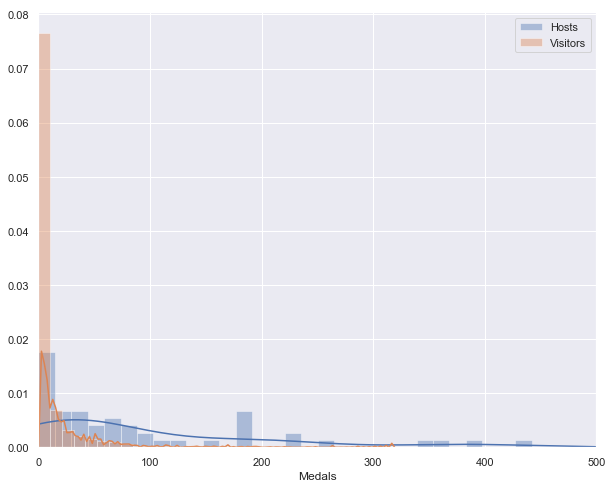

In [12]:
plt.figure("Host Advantage", figsize=(10,8))
sns.distplot(hosts['Medals'],    label='Hosts',    bins=30)
sns.distplot(visitors['Medals'], label='Visitors', bins=30)
plt.legend()
plt.xlim((0,500))
#plt.ylim((0,0.05))
plt.show()

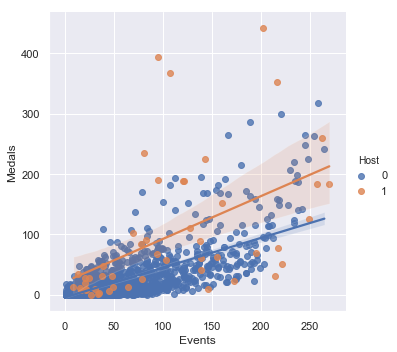

In [13]:
g = sns.lmplot(x="Events", y="Medals", hue="Host", truncate=True, height=5, data=medals)

# Summer and Winter Games

In [14]:
summer = medals[medals['Summer'] == 1]
summer.head()

,Year,Summer,Games,Host,NOC,Region,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes
0,1896,1,1896 Summer,0,AUS,Australia,5,0,2,5,3,2,0,1
1,1896,1,1896 Summer,0,AUT,Austria,8,0,3,8,5,2,1,2
2,1896,1,1896 Summer,0,DEN,Denmark,15,0,5,12,6,1,2,3
3,1896,1,1896 Summer,0,FRA,France,26,0,6,18,11,5,4,2
4,1896,1,1896 Summer,0,GBR,UK,25,0,7,19,9,3,3,3


In [15]:
winter = medals[medals['Summer'] == 0]
winter.head()

,Year,Summer,Games,Host,NOC,Region,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes
204,1924,0,1924 Winter,0,AUS,Australia,1,0,1,1,1,1,0,0
205,1924,0,1924 Winter,0,AUT,Austria,4,2,1,3,4,3,1,0
206,1924,0,1924 Winter,0,BEL,Belgium,32,1,4,8,5,0,0,5
207,1924,0,1924 Winter,0,CAN,Canada,17,2,3,8,9,9,0,0
208,1924,0,1924 Winter,0,FIN,Finland,33,1,6,11,15,4,8,3


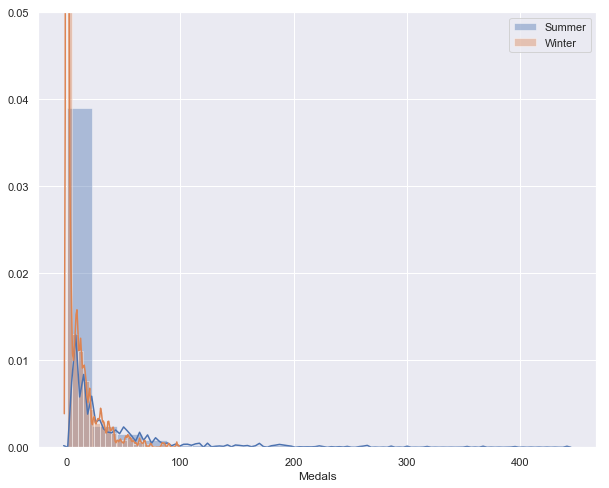

In [16]:
plt.figure("Summer and Winter Games", figsize=(10,8))
sns.distplot(summer['Medals'], label='Summer', bins=20)
sns.distplot(winter['Medals'], label='Winter', bins=20)
plt.legend()
#plt.xlim((0,500))
plt.ylim((0,0.05))
plt.show()

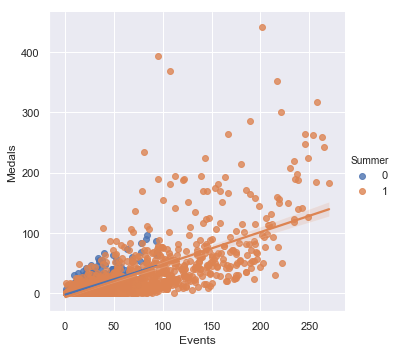

In [17]:
h = sns.lmplot(x="Events", y="Medals", hue="Summer", truncate=True, height=5, data=medals)

# Correlation

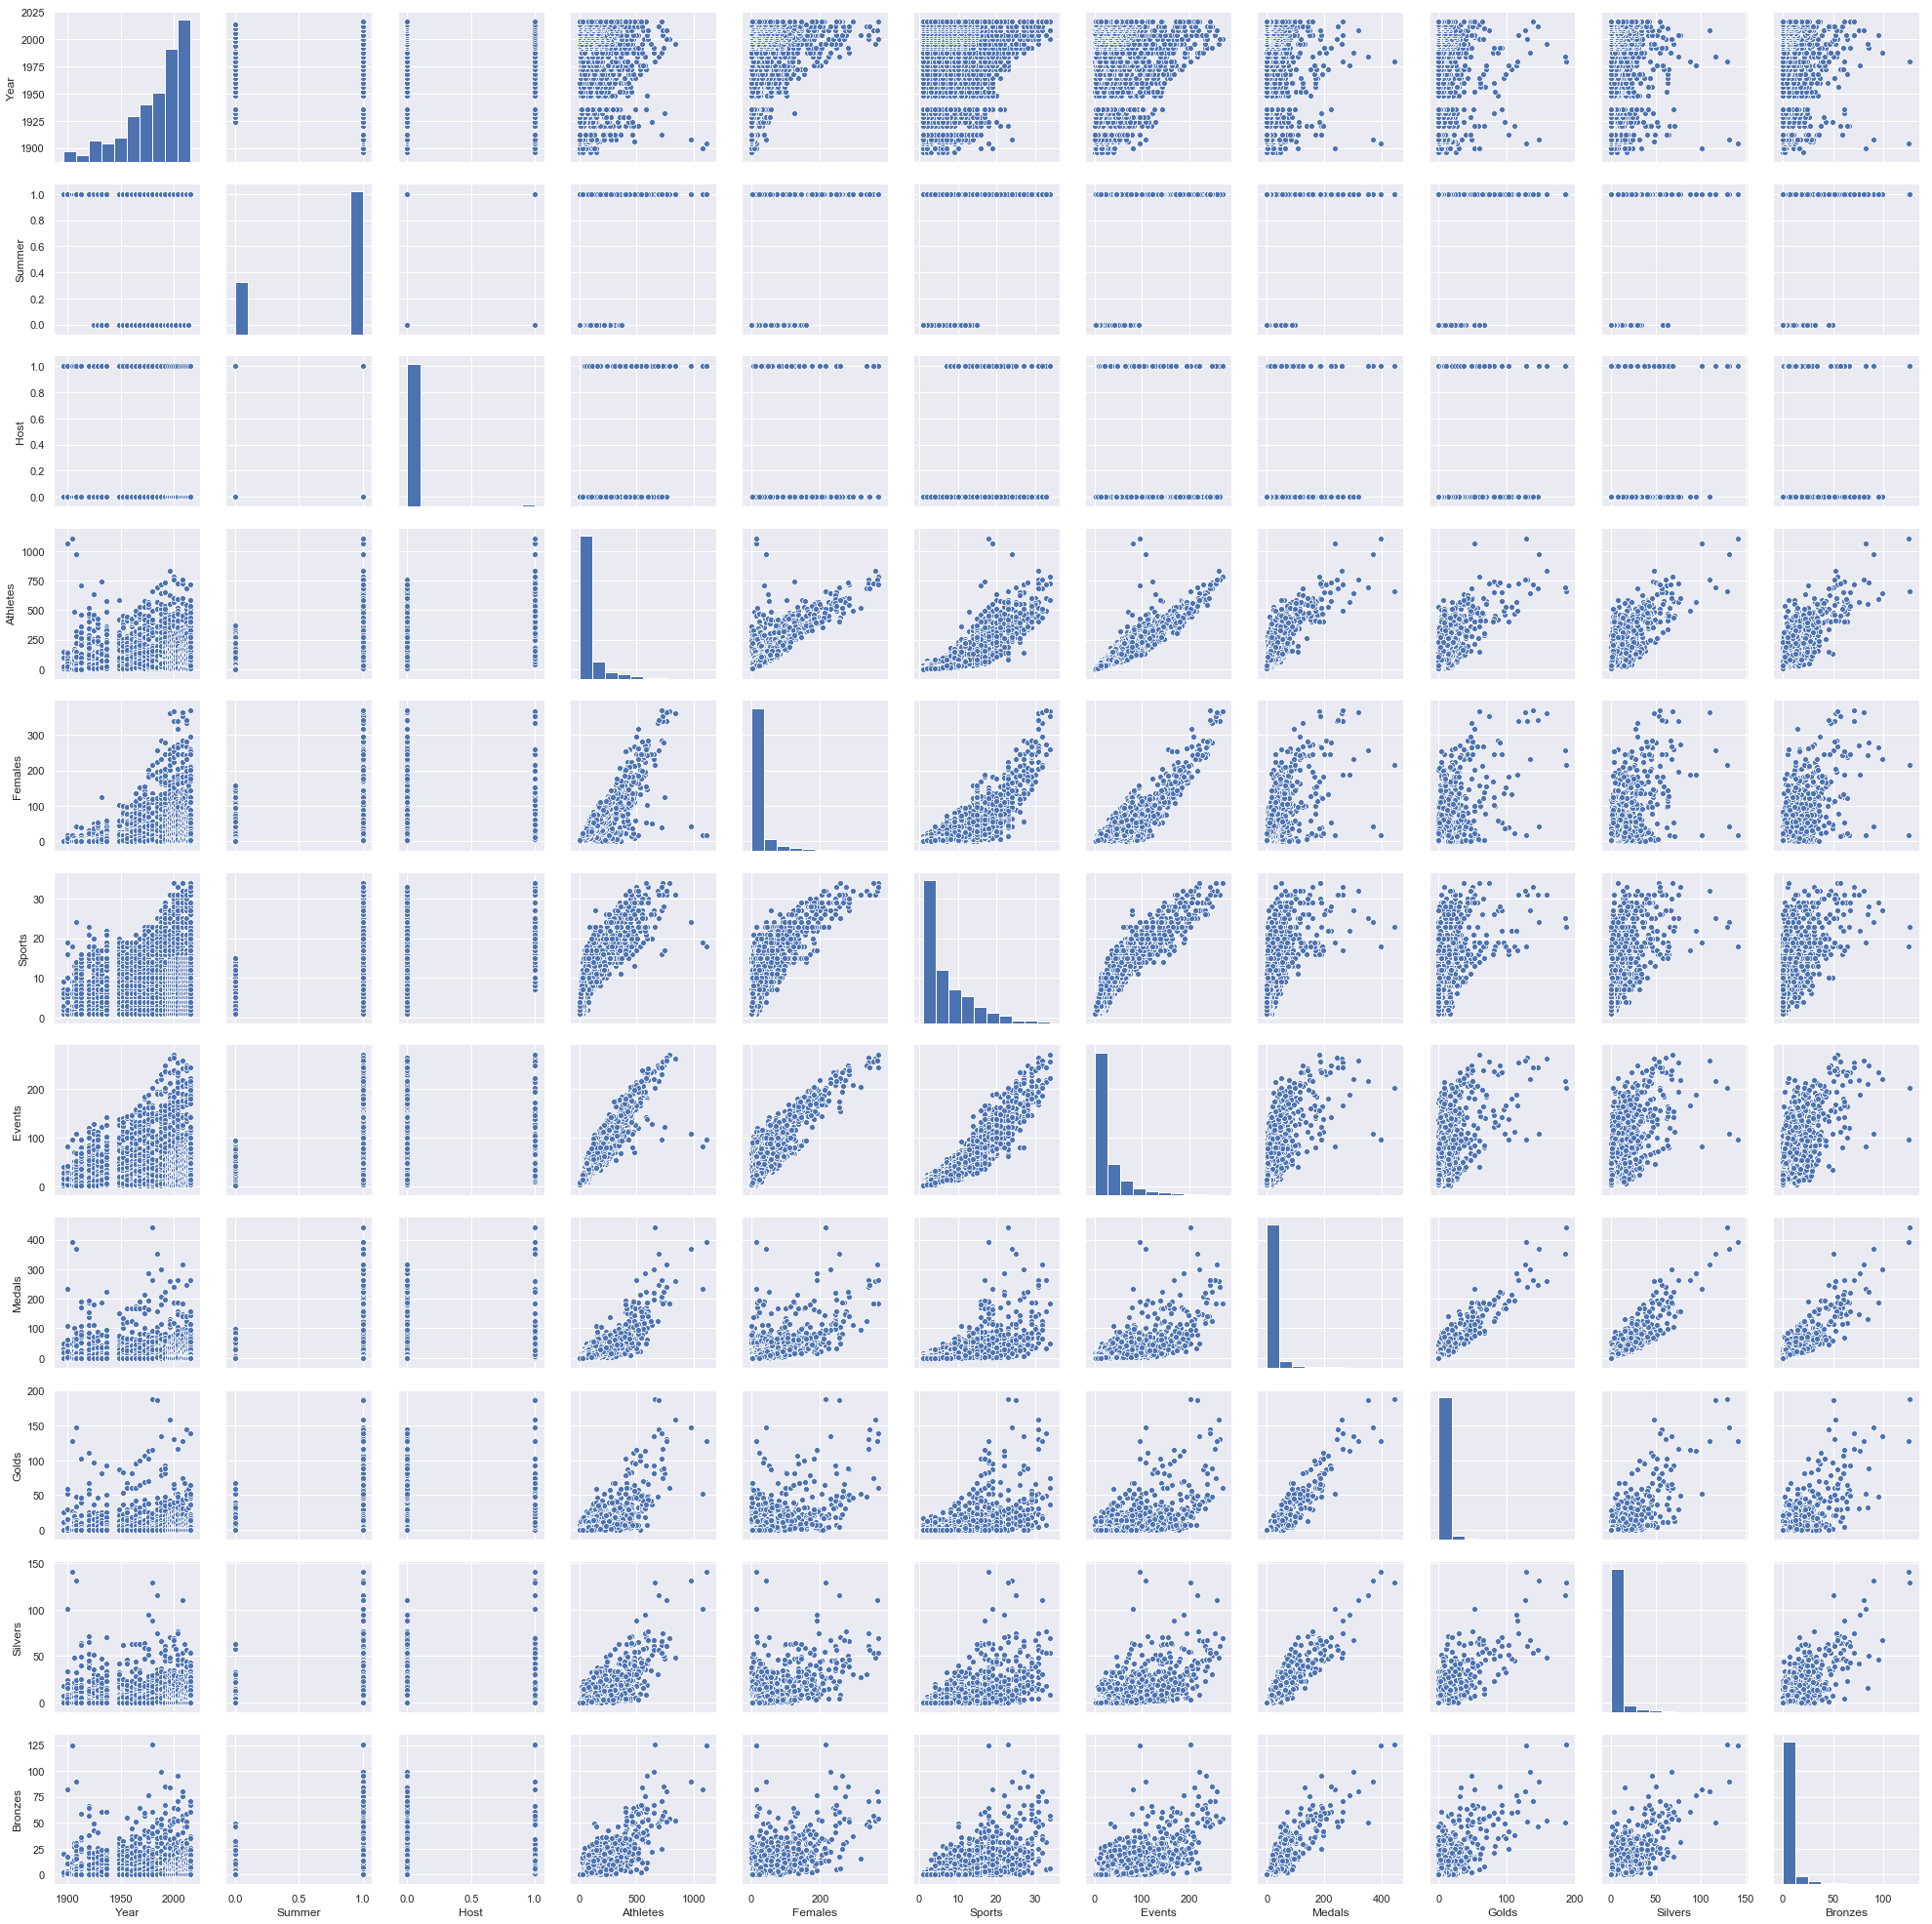

In [18]:
sns.pairplot(medals)
plt.show()